# Neural Network: Classification with one hidden layer
- 2-class classification neural network with a single hidden layer using non-linear activation function (tanh) 


## Neural Network model

Train a Neural Network with a single hidden layer.
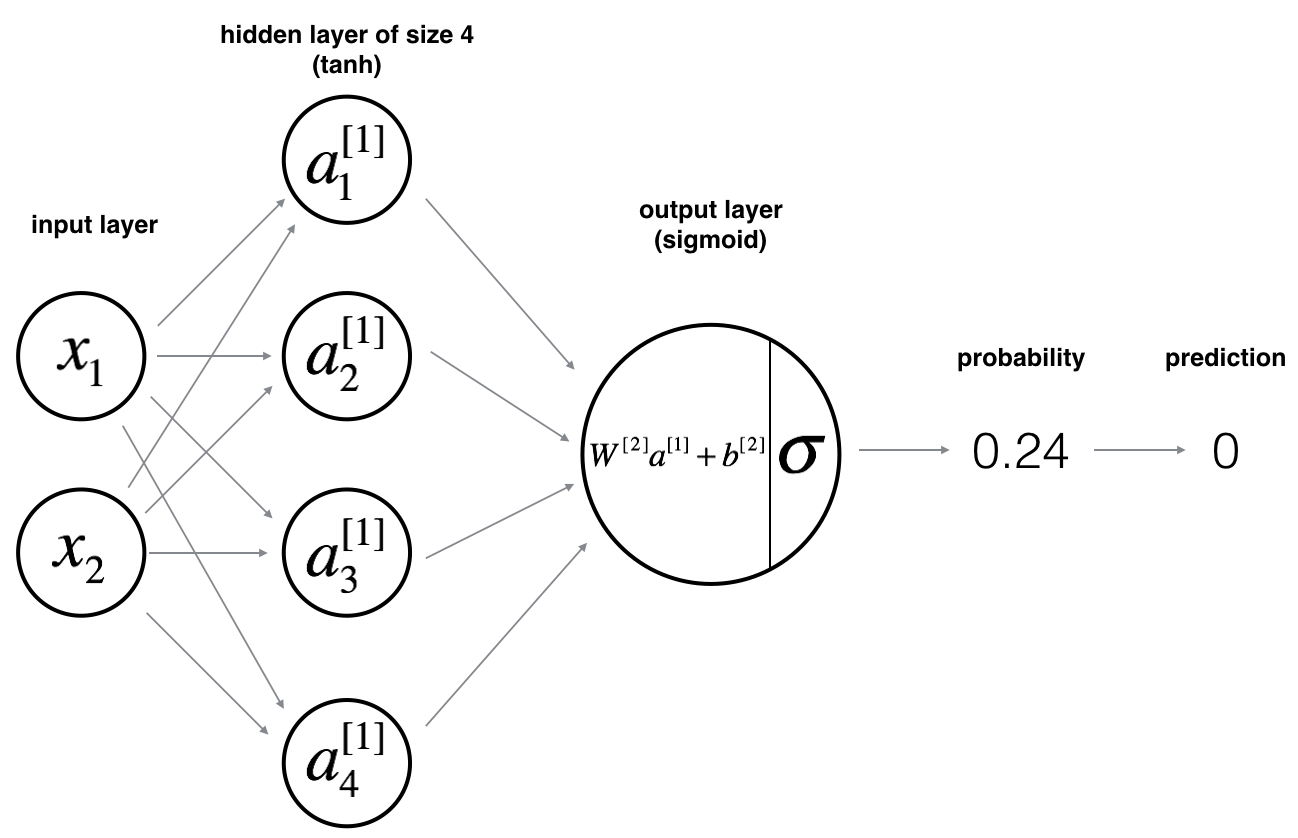

### Defining the neural network structure 

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

### Forward_propagation

- Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ 
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

### Compute the cost function:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$


### Backward Propagation



$$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$$

$$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $$

$$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$$

$$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $$

$$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $$

$$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
$ dW1 =\frac{\partial \mathcal{J} }{ \partial W_1 }$,$ db1 = \frac{\partial \mathcal{J} }{ \partial b_1 }$,$ dW2 = \frac{\partial \mathcal{J} }{ \partial W_2 }$,$ db2 =\frac{\partial \mathcal{J} }{ \partial b_2 }$
    


- Derivative of tanh:
    To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})=( 1 - a^{[1] (i) 2})$. 
    
   

### Gradient Descent Updates
use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

 $$ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.



### Predictions

predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

# Building Neural Network Model

In [2]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s


In [3]:
def layer_sizes(X, Y):
    inputLayerSize = X.shape[0] # size of input layer
    outputLayerSize = Y.shape[0] # size of output layer
    return (inputLayerSize, outputLayerSize)

In [4]:
def initialize_parameters(inputLayerSize, hiddenLayerSize, outputLayerSize):
    W1 = np.random.randn(hiddenLayerSize, inputLayerSize) * 0.01
    b1 = np.zeros((hiddenLayerSize, 1))
    W2 = np.random.randn(outputLayerSize, hiddenLayerSize) * 0.01
    b2 = np.zeros((outputLayerSize, 1))
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    return parameters

In [5]:
def forward_propagation(X, parameters):  
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
      
    cache = {"Z1": Z1,"A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache

In [6]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # number of example
    
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2),Y) + ((1-Y) * np.log(1 - A2) )
    cost = - (1/m) * np.sum(logprobs)
 
    cost = np.squeeze(cost)     
    return cost

In [7]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis =1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2)* (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis =1, keepdims = True)
    
    grads = {"dW1": dW1,"db1": db1,"dW2": dW2, "db2": db2}
    
    return grads

In [8]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
     
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [9]:
def model(X, Y, hiddenLayerSize, num_iterations = 10000, print_cost=False,learning_rate=1.2):
       
    inputLayerSize,outputLayerSize = layer_sizes(X, Y)
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. 
    parameters = initialize_parameters(inputLayerSize, hiddenLayerSize, outputLayerSize)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    costs = []
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads,learning_rate)
        
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            
    
    parameters["costs"]=costs
    parameters["learning_rate"]=learning_rate
    
                 
    return parameters

In [10]:
def predict(parameters, X):      
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

In [11]:
def plot_decision_boundary(model, X, y):
     
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.1
    # Generate a grid of points with distance h between them
    u=np.arange(x_min, x_max, h)
    v=np.arange(y_min, y_max, h)
    #u=np.linspace(x_min, x_max, 50) 
    #v=np.linspace(y_min, y_max, 50)
    U, V = np.meshgrid(u, v)
    XY=np.column_stack((U.ravel(), V.ravel()))
    # Predict the function value for the whole grid
    W = model(XY)
    W = W.reshape(U.shape)
    # Plot the contour and training examples
    plt.contourf(U, V, W, cmap=plt.cm.Spectral,alpha=0.5)
    #plt.scatter(U.flatten(),V.flatten(),c=W.flatten(),alpha=0.2, marker='.',cmap=plt.cm.Spectral)
    
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :].flatten(), X[1, :].flatten(), c=y.flatten(), cmap=plt.cm.Spectral)
    

# Data Generator

In [12]:
def load_dataset(dataset = "noisy_moons"):  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    
    
    datasets = {"noisy_circles": noisy_circles,"noisy_moons": noisy_moons,
                "blobs": blobs,"gaussian_quantiles": gaussian_quantiles}
    
    if (dataset=="planar"):
        np.random.seed(1)
        m = 400 # number of examples
        N = int(m/2) # number of points per class
        D = 2 # dimensionality
        X = np.zeros((m,D)) # data matrix where each row is a single example
        Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
        a = 4 # maximum ray of the flower

        for j in range(2):
            ix = range(N*j,N*(j+1))
            t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
            r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
            X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            Y[ix] = j

        X = X.T
        Y = Y.T
    else:
        X, Y = datasets[dataset]
        X, Y = X.T, Y.reshape(1, Y.shape[0])

    # make blobs binary
    if dataset == "blobs":
        Y = Y%2
        
    return  X, Y


## Dataset ##

In [13]:
np.random.seed(1) # set a seed so that the results are consistent
#Options for dataset "planar","noisy_circles","noisy_moons","blobs","gaussian_quantiles"
X, Y = load_dataset("noisy_moons") 

### Visualize the dataset

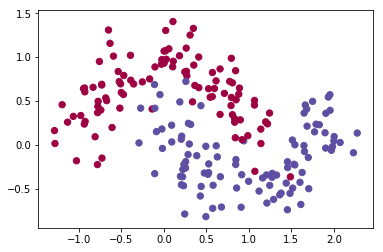

In [14]:
# Visualize the data:
plt.scatter(X[0, :].flatten(), X[1, :].flatten(), c=Y.flatten(), s=40, cmap=plt.cm.Spectral);

## Test your model
For a single hidden layer of $n_h$ hidden units.

In [15]:
# Build a model with a n_h-dimensional hidden layer
myModel = model(X, Y, hiddenLayerSize = 4, num_iterations = 5000, print_cost=True)

Cost after iteration 0: 0.693213
Cost after iteration 1000: 0.316552
Cost after iteration 2000: 0.318167
Cost after iteration 3000: 0.316581
Cost after iteration 4000: 0.316166


### Print Accuracy

In [16]:
predictions = predict(myModel, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 86%


### Plotting Decision Boundary and Learning Curve

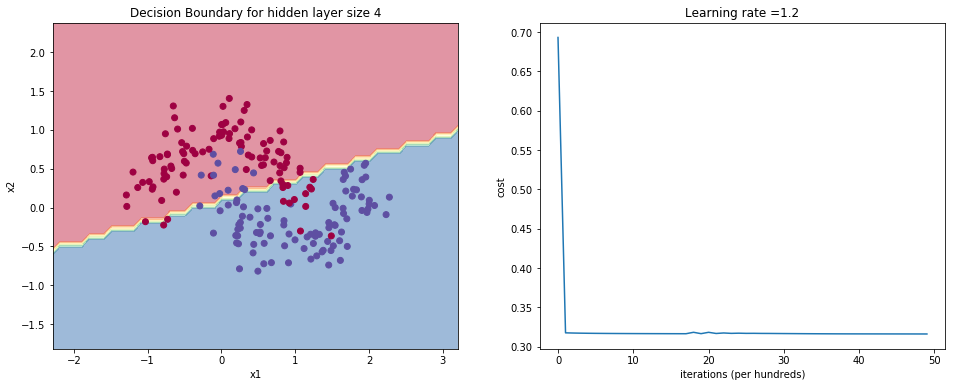

In [17]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(myModel, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

plt.subplot(122)
# Plot learning curve (with costs)
costs = np.squeeze(myModel['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(myModel["learning_rate"]))
plt.show()

### Tuning hidden layer size###

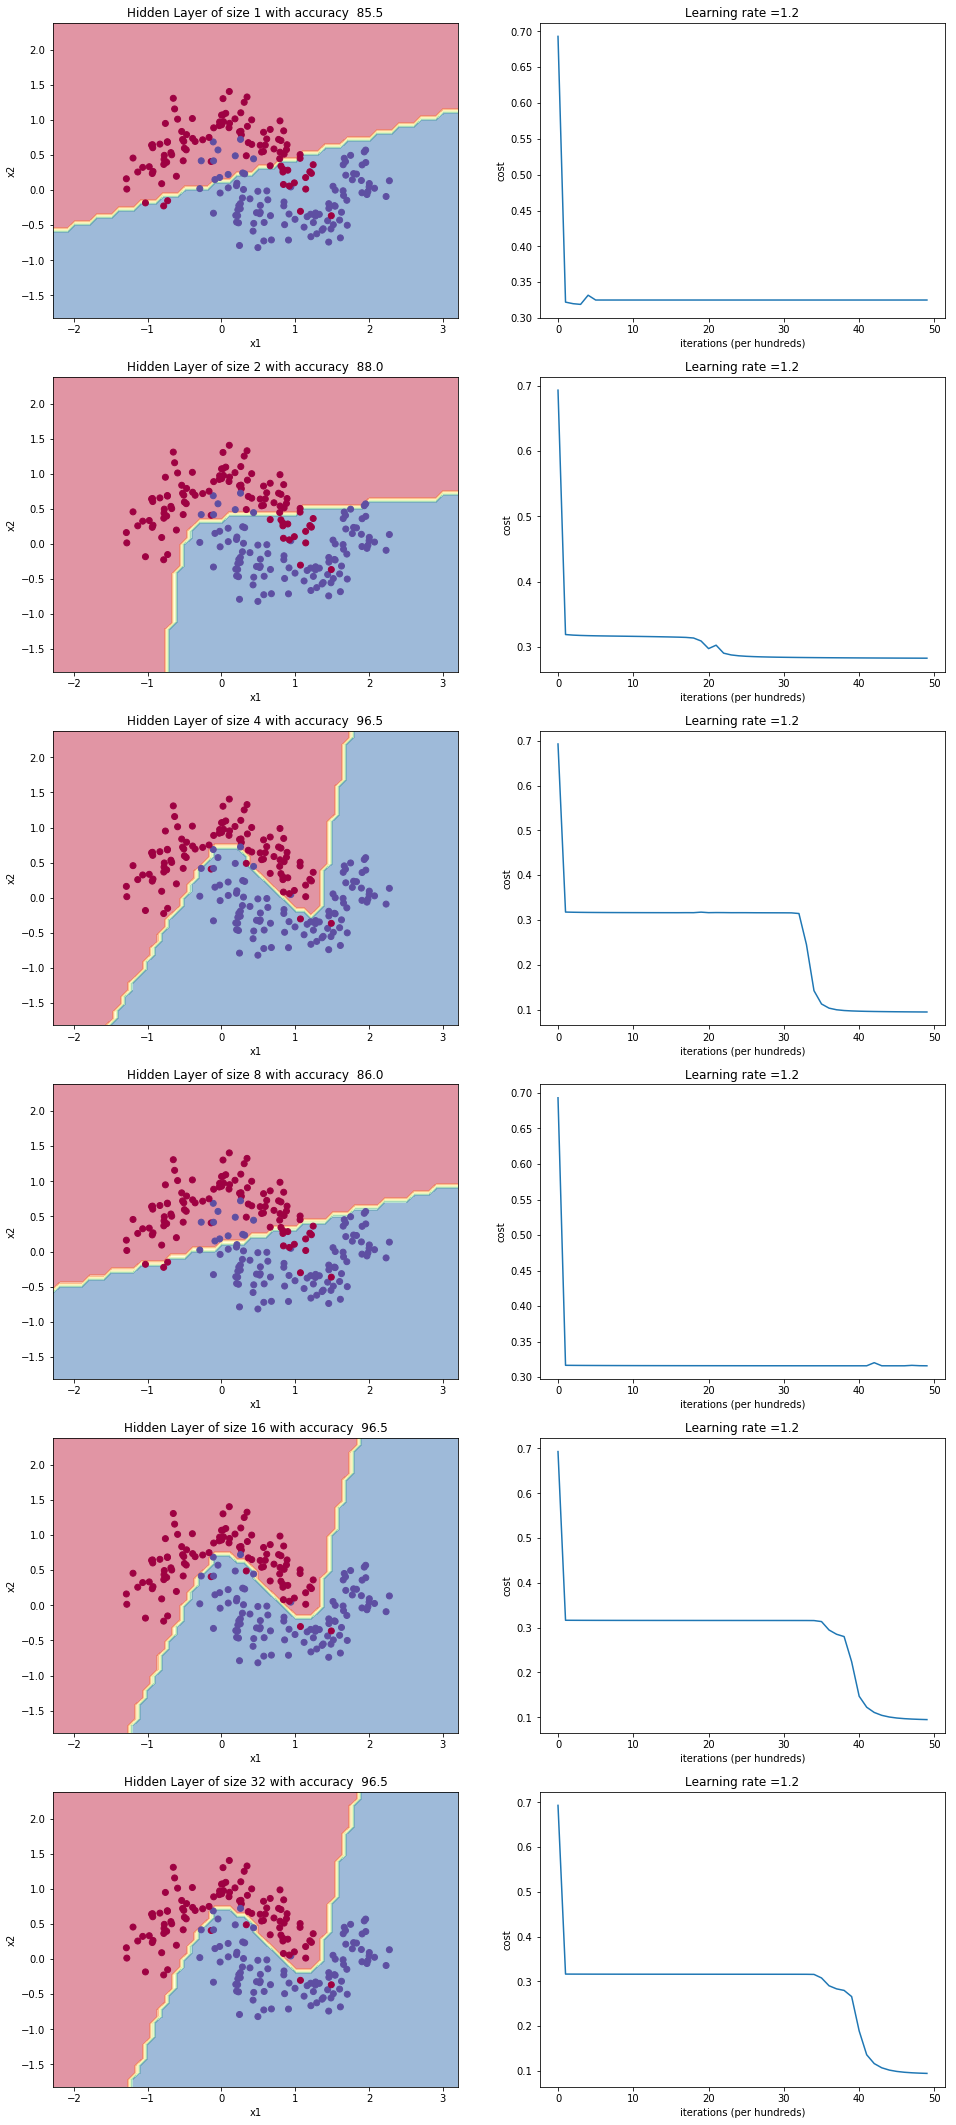

In [18]:
# This may take about 2 minutes to run
plt.figure(figsize=(16, 64))
hidden_layer_sizes = [1, 2, 4, 8, 16, 32]
for i, hiddenLayerSize in enumerate(hidden_layer_sizes):
   
   
    myModel = model(X, Y, hiddenLayerSize, num_iterations = 5000,learning_rate=1.2)
    predictions = predict(myModel, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
   
    # Plot decision boundary
    plt.subplot(10, 2, 2*i+1)
    plot_decision_boundary(lambda x: predict(myModel, x.T), X, Y)
    plt.title('Hidden Layer of size %d with accuracy %5.1f' % (hiddenLayerSize,accuracy))
    
    
    # Plot learning curve (with costs)
    plt.subplot(10, 2, 2*i+2)
    costs = np.squeeze(myModel['costs'])
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(myModel["learning_rate"]))
    
    

## Different Datasets

In [19]:
def modelwithPlot(X, Y, hiddenLayerSize, num_iterations,learning_rate):
    myModel = model(X, Y, hiddenLayerSize, num_iterations = num_iterations,learning_rate=learning_rate)
    predictions = predict(myModel, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)

    plt.figure(figsize=(16, 6))
    # Plot decision boundary
    plt.subplot(1, 2, 1)
    plot_decision_boundary(lambda x: predict(myModel, x.T), X, Y)
    plt.title(' hidden Layers=%d  accuracy= %5.1f' % (hiddenLayerSize,accuracy))
    plt.subplot(1, 2, 2)

    # Plot learning curve (with costs)
    costs = np.squeeze(myModel['costs'])
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(myModel["learning_rate"]))
    plt.show()

## noisy_circles

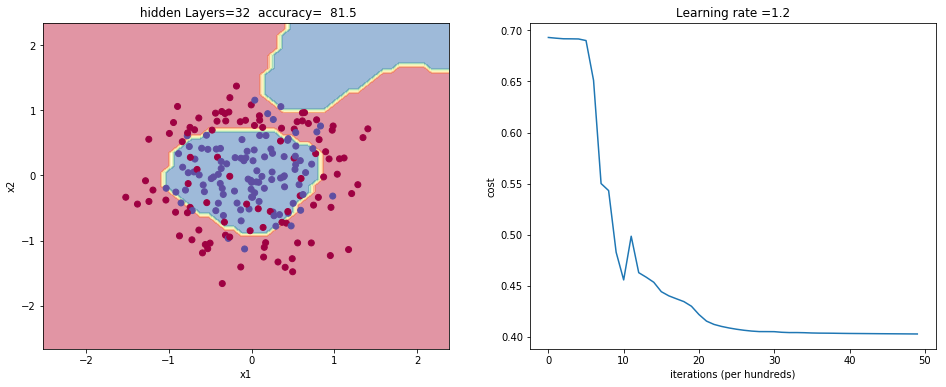

In [20]:
X, Y = load_dataset("noisy_circles") 
modelwithPlot(X,Y,hiddenLayerSize=32,num_iterations = 5000,learning_rate=1.2)

## noisy_moons

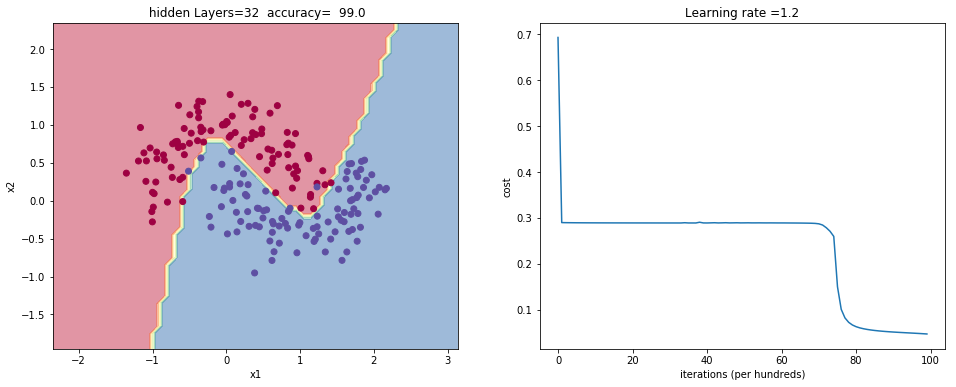

In [21]:
X, Y = load_dataset("noisy_moons") 
modelwithPlot(X,Y,hiddenLayerSize=32,num_iterations = 10000,learning_rate=1.2)

## blobs

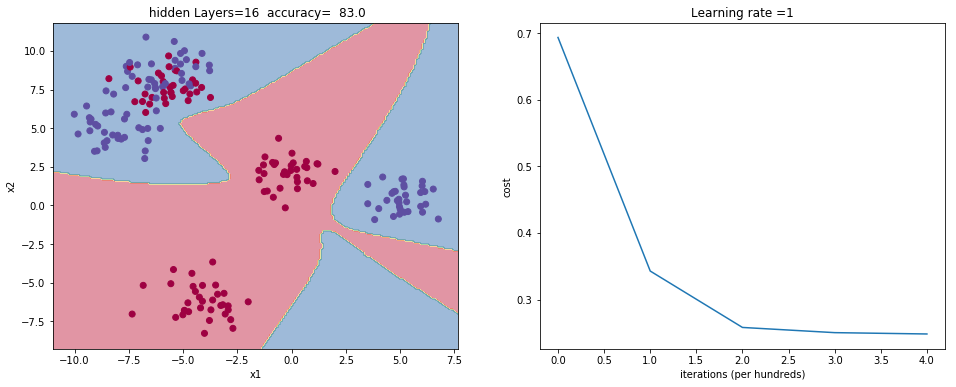

In [22]:
X, Y = load_dataset("blobs") 
modelwithPlot(X,Y,hiddenLayerSize=16,num_iterations = 500,learning_rate=1)

## gaussian_quantiles

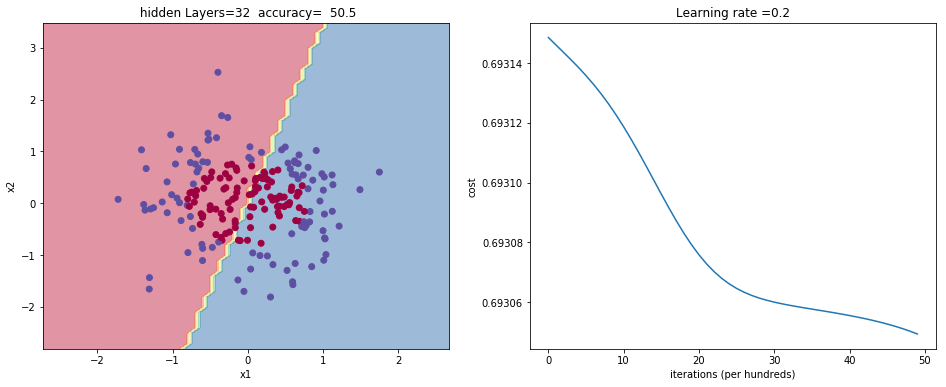

In [23]:
X, Y = load_dataset("gaussian_quantiles") 
modelwithPlot(X,Y,hiddenLayerSize=32,num_iterations = 5000,learning_rate=0.2)

## planar

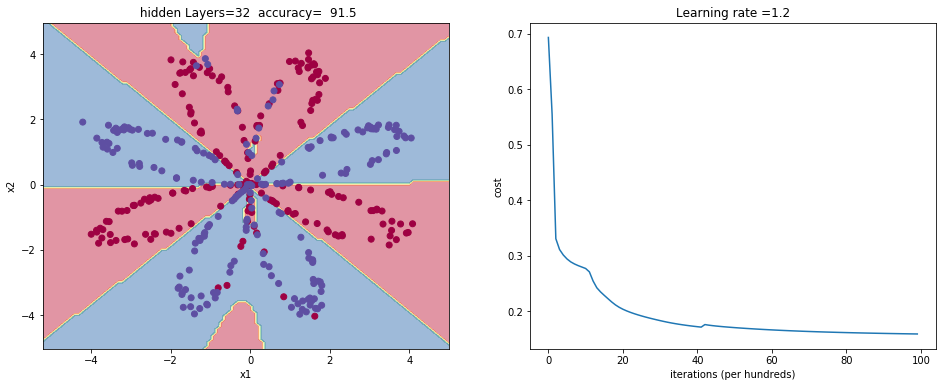

In [24]:
X, Y = load_dataset("planar") 
modelwithPlot(X,Y,hiddenLayerSize=32,num_iterations = 10000,learning_rate=1.2)